# Solving Edutech Company Problems

## Preparation

### Install the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Preparing the data

In [ ]:
url = "https://drive.google.com/uc?id=1hfXQbYuWfJ2E_1TMVu5ebYOnYhXxGR0C"
edu_df = pd.read_csv(url, sep = ";")

In [ ]:
edu_df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [ ]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Tidak terlihat ada anomali seperti ketidaksesuaian tipe data dan lainnya.

In [ ]:
edu_df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Tidak ada kolom yang mempunyai nilai null, sehingga data sudah bersih dari nilai null.

In [ ]:
edu_df.duplicated().sum()

np.int64(0)

Tidak ada data yang terduplikasi

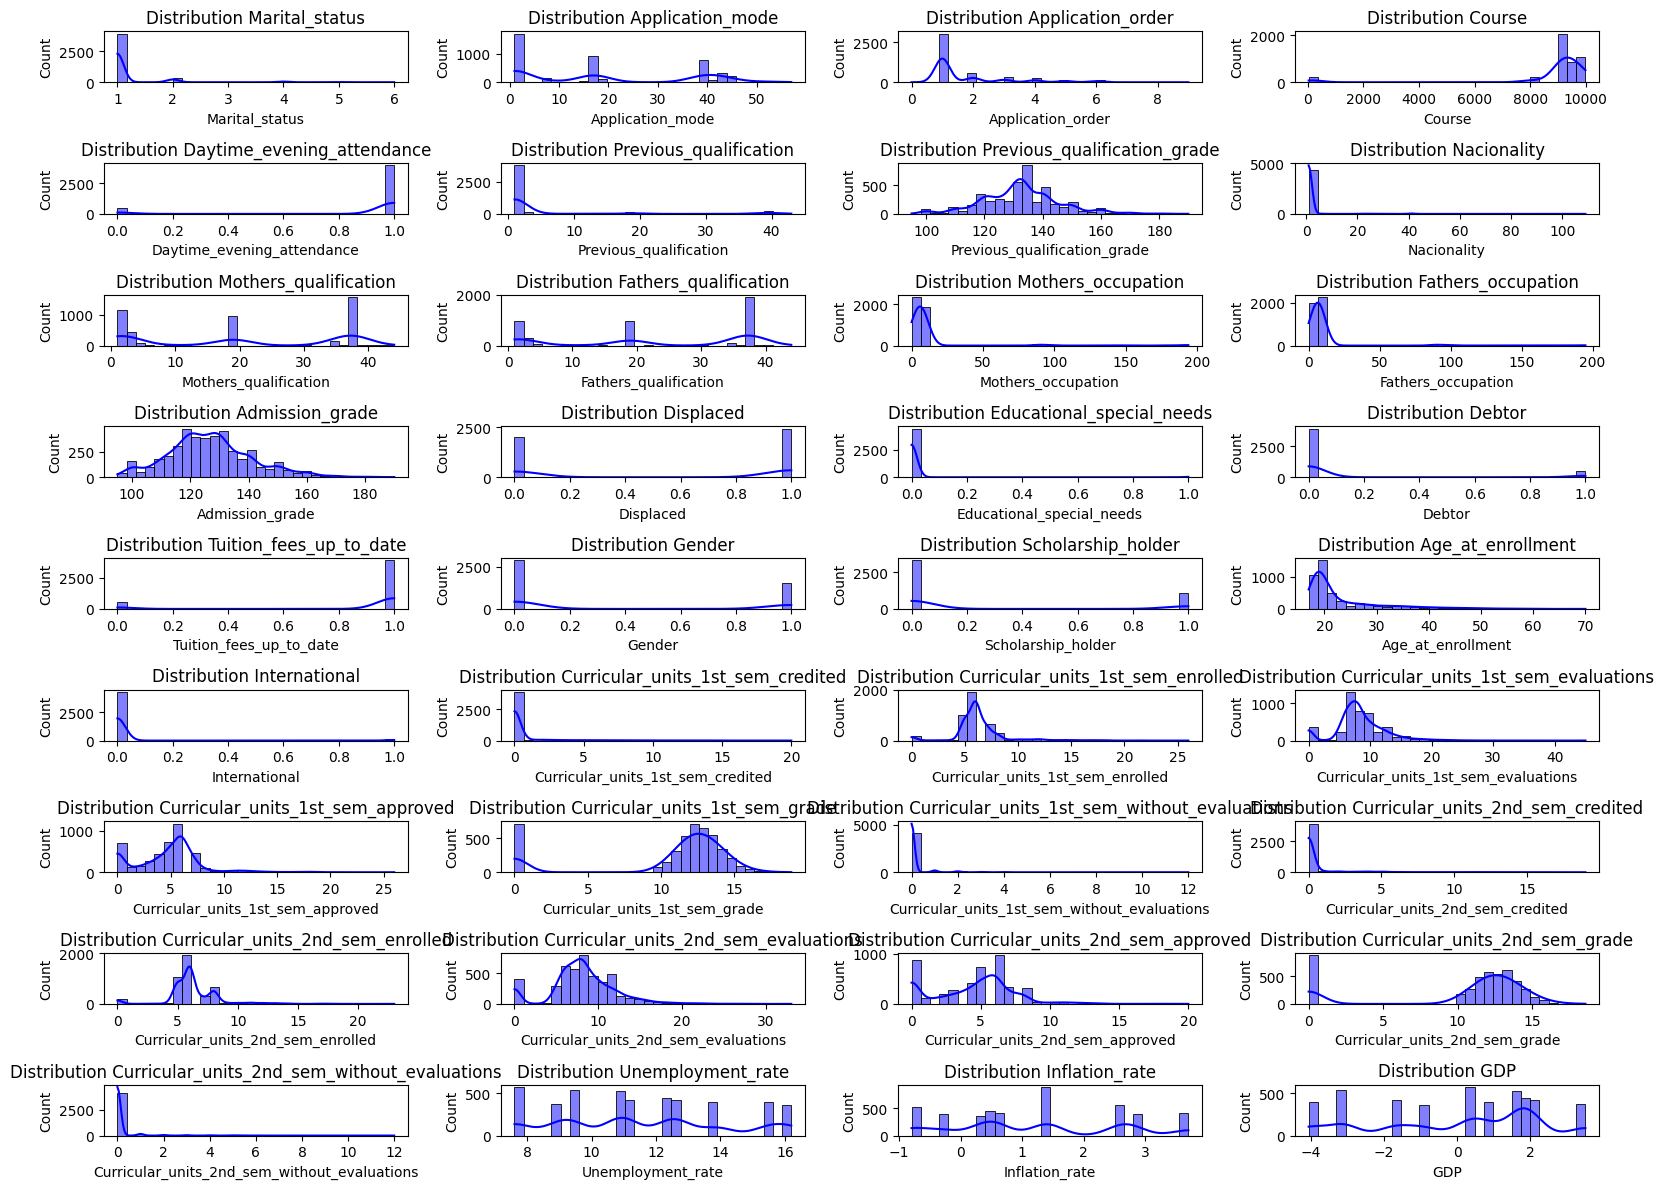

In [ ]:
#Numerical Feature Distribution
num_features = edu_df.select_dtypes(include=[np.number])
n_cols = 4
n_rows = (len(num_features.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 12))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(edu_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2140580417.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=edu_df[column], palette='viridis')


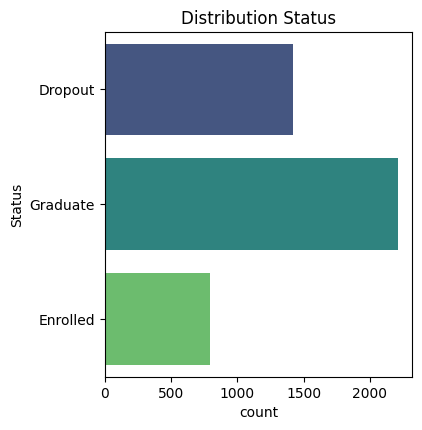

In [ ]:
# Categorical Feature Distribution
cat_features = edu_df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=edu_df[column], palette='viridis')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

There is an imbalance between the dropout and enrolled data compared to the graduate data, which can be addressed by applying oversampling methods to balance the dataset.

In [ ]:
edu_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Nothing looks weird / anomaly

# Data Preparation / Preprocessing

In [ ]:
edu_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

Average Grade Student

In [ ]:
edu_df['Curricular_units_2nd_sem_grad'] = edu_df['Curricular_units_2nd_sem_grade'].round(2)

In [ ]:
edu_df['Curricular_units_1st_sem_grade'] = edu_df['Curricular_units_1st_sem_grade'].round(2)

In [ ]:
edu_df["Average_Grade"] = edu_df["Curricular_units_1st_sem_grade"] + edu_df["Curricular_units_2nd_sem_grade"]
edu_df["Average_Grade"] = edu_df["Average_Grade"] / 2
edu_df["Average_Grade"] = edu_df["Average_Grade"].round(2)


Calculating the average grade to determine whether there is a trend or correlation with a student dropping out or not.

In [ ]:
edu_df.to_csv("edu_df.csv", index=False)

Convert it into a CSV format for dashboard analysis by stakeholders.

In [ ]:
edu_df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

# EDA

In [ ]:
numerical_columns = edu_df.select_dtypes(include=[np.number]).columns

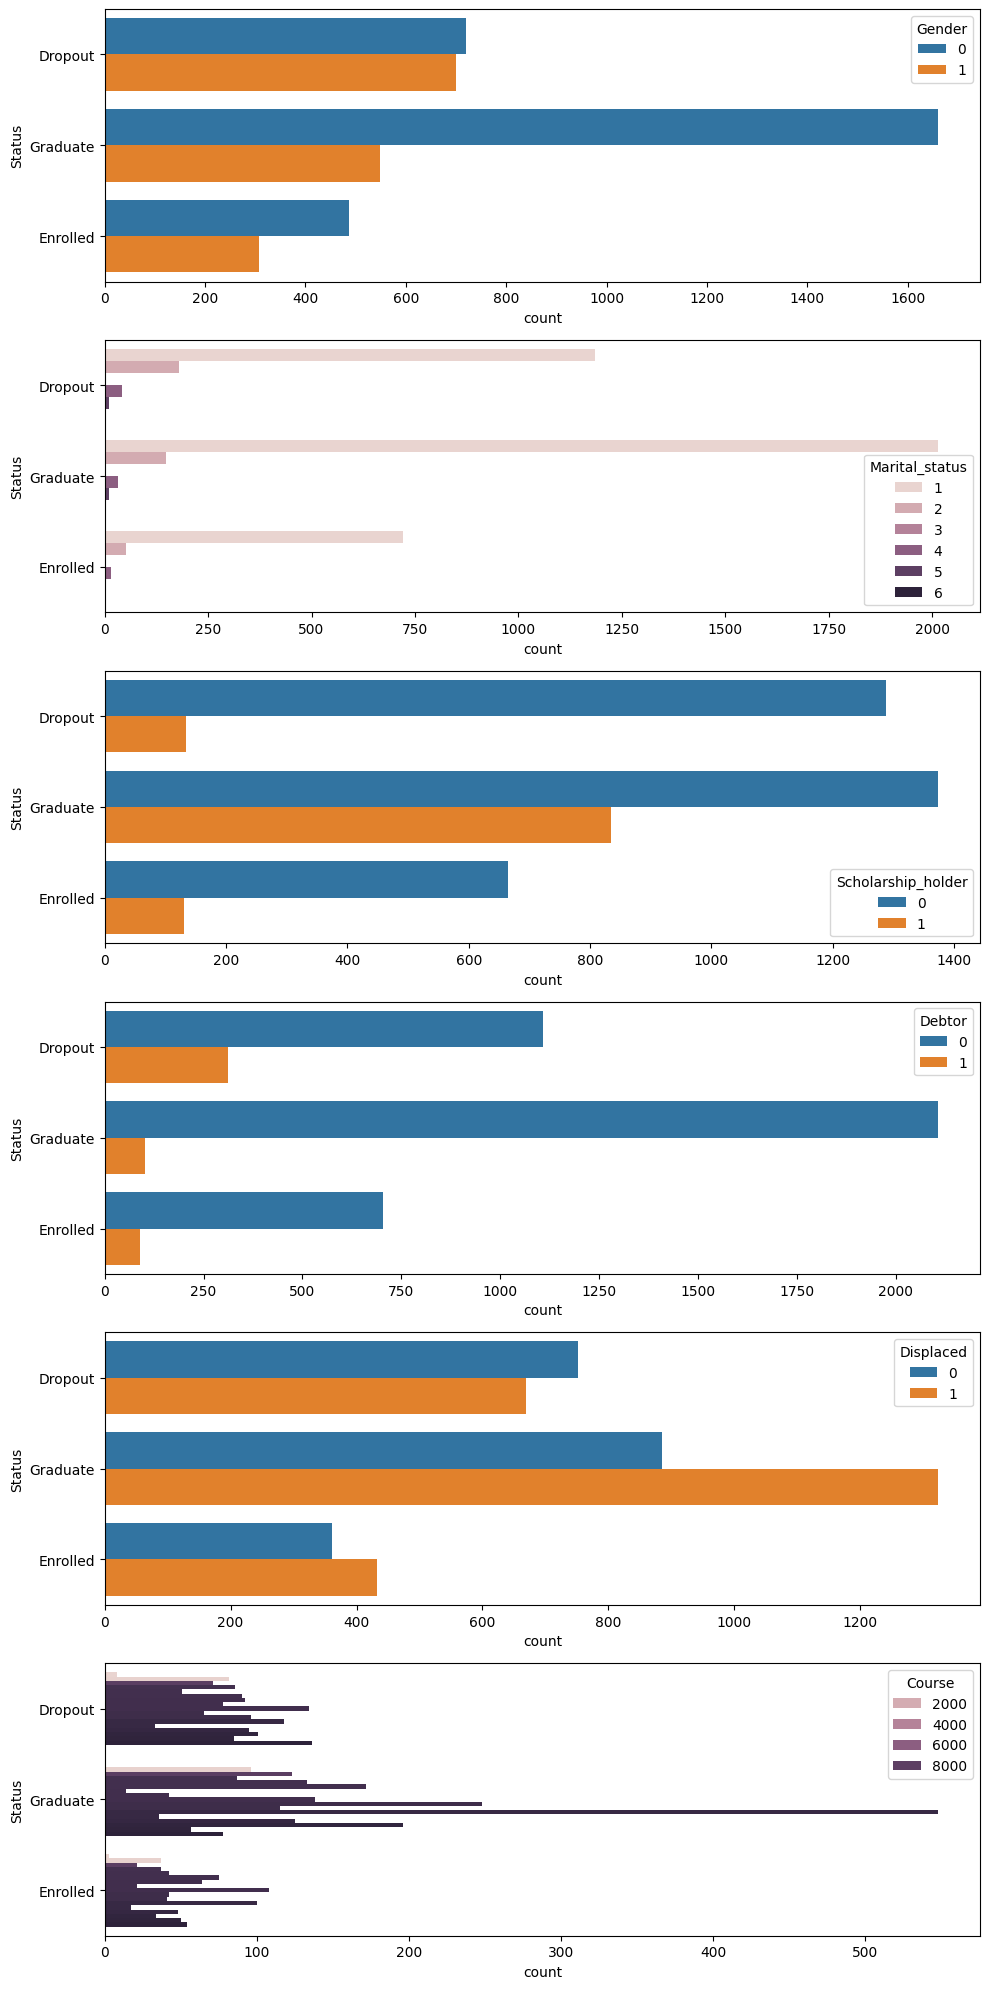

In [ ]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[
        'Gender',
        'Marital_status',
        'Scholarship_holder',
        'Debtor',
        'Displaced',
        'Course'
    ],
    df=edu_df,
    segment_feature="Status"
)


Categorical Variable Analysis

a. Gender

Male students (1) are more dominant in the Graduate category, while female students (0) are more evenly distributed between Dropout and Graduate.

This suggests that the graduation rate appears to be slightly higher for male students in this dataset.

b. Marital Status

The majority of students fall into the single category (1).

Married students (2) and other categories are relatively few; however, married students tend to appear more often in the Graduate category.

This may indicate that married students are more stable in terms of motivation or financial conditions.

c. Scholarship Holder

Students who receive scholarships (1) have a larger proportion in the Graduate category compared to Dropout.

This indicates that scholarships are positively correlated with graduation rates — possibly because financial support helps students complete their studies.

d. Debtor

Students without debt (0) dominate both the Graduate and Dropout categories, but students with debt (1) tend to appear more frequently in the Dropout category.

This suggests that financial burden may increase the risk of dropping out.

e. Displaced

Students who live away from home (1) include many who graduate, but also many who drop out.

This pattern suggests that being away from home has two sides — some students succeed due to increased independence, while others struggle due to adaptation challenges.

f. Course

The distribution across courses varies significantly.

Some programs (certain course codes) show a higher number of Graduate students, while other programs tend to have higher Dropout rates.

/tmp/ipython-input-1573006874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1573006874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1573006874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1573006874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


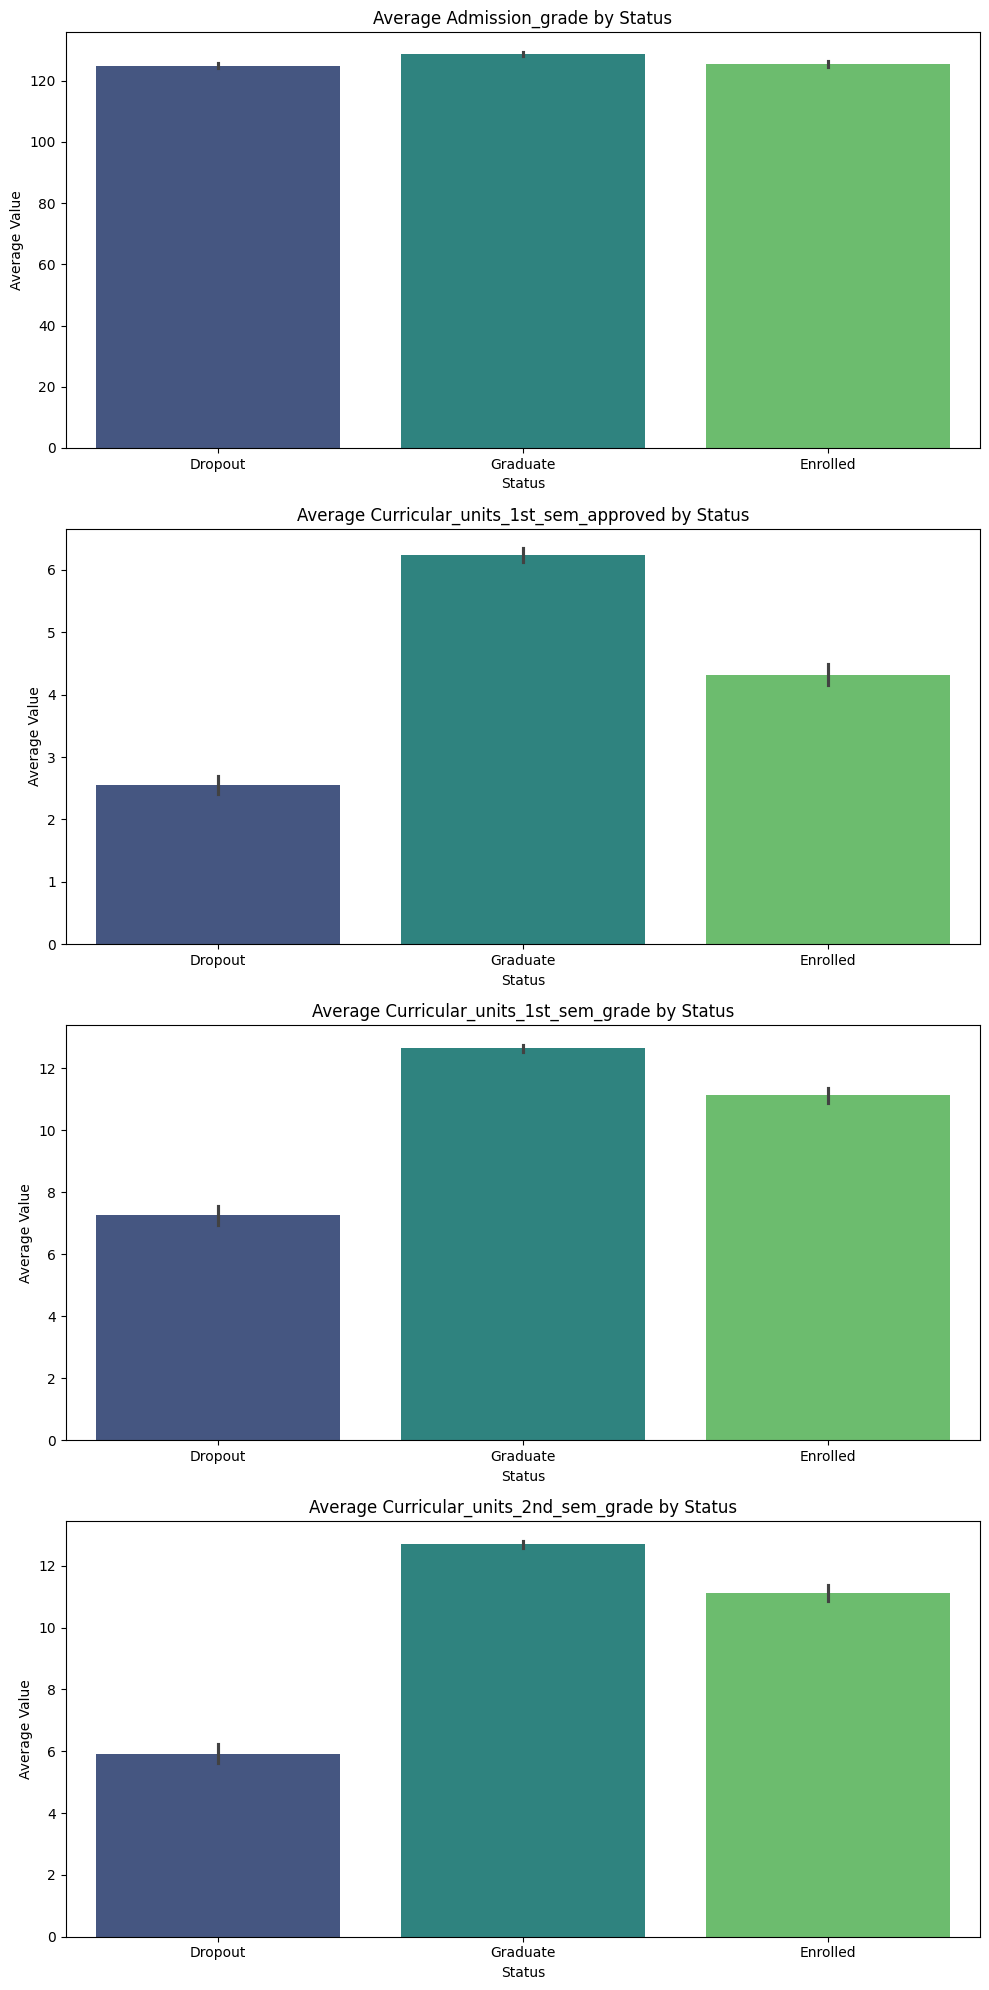

In [ ]:
def average_plot(features, df, segment_feature):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 20))

    for i, feature in enumerate(features):
        sns.barplot(
            data=df,
            x=segment_feature,
            y=feature,
            estimator=np.mean,
            errorbar=('ci', 95),
            ax=ax[i],
            palette="viridis"
        )
        ax[i].set_title(f'Average {feature} by {segment_feature}')
        ax[i].set_ylabel('Average Value')
        ax[i].set_xlabel(segment_feature)

    plt.tight_layout()
    plt.show()

average_plot(
    features=[
        'Admission_grade',
        'Curricular_units_1st_sem_approved',
        'Curricular_units_1st_sem_grade',
        'Curricular_units_2nd_sem_grade'
    ],
    df=edu_df,
    segment_feature="Status"
)

Numerical Variable Analysis (Average Plot)

a. Admission Grade

The average admission grade of Graduate students is slightly higher than that of Dropout students.

This suggests that initial academic quality (admission grade) plays a role in study success, although the difference is not very pronounced.

b. Curricular Units 1st Semester (Approved)

Graduate students have a much higher average number of approved courses in the first semester compared to Dropout students.

Dropout students pass on average only about 2–3 courses, while Graduate students pass more than 6.

This is a strong indicator that early-semester performance is a key determinant of graduation.

c. Curricular Units 1st Semester (Grade)

The average first-semester grades of Graduate students are also significantly higher (~12–13) compared to Dropout students (~7–8).

This pattern reinforces the previous finding: performance in the first semester is an early determinant of academic success.

d. Curricular Units 2nd Semester (Grade)

The pattern is consistent with the first semester: Graduate students have higher average grades (~13) compared to Dropout students (~6).

This indicates that academic consistency across the first two semesters is a major factor in completing the study program.

In [ ]:
course_status = edu_df.groupby(['Course', 'Status']).size().reset_index(name='Count')
total_per_course = course_status.groupby('Course')['Count'].sum().reset_index(name='Total')
course_status = pd.merge(course_status, total_per_course, on='Course')
course_status['Percentage'] = ((course_status['Count'] / course_status['Total']) * 100).round(2)
course_status.head(10)

,Course,Status,Count,Total,Percentage
0,33,Dropout,8,12,66.67
1,33,Enrolled,3,12,25.00
2,33,Graduate,1,12,8.33
3,171,Dropout,82,215,38.14
4,171,Enrolled,37,215,17.21
5,171,Graduate,96,215,44.65
6,8014,Dropout,71,215,33.02
7,8014,Enrolled,21,215,9.77
8,8014,Graduate,123,215,57.21
9,9003,Dropout,86,210,40.95


/tmp/ipython-input-4245392557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


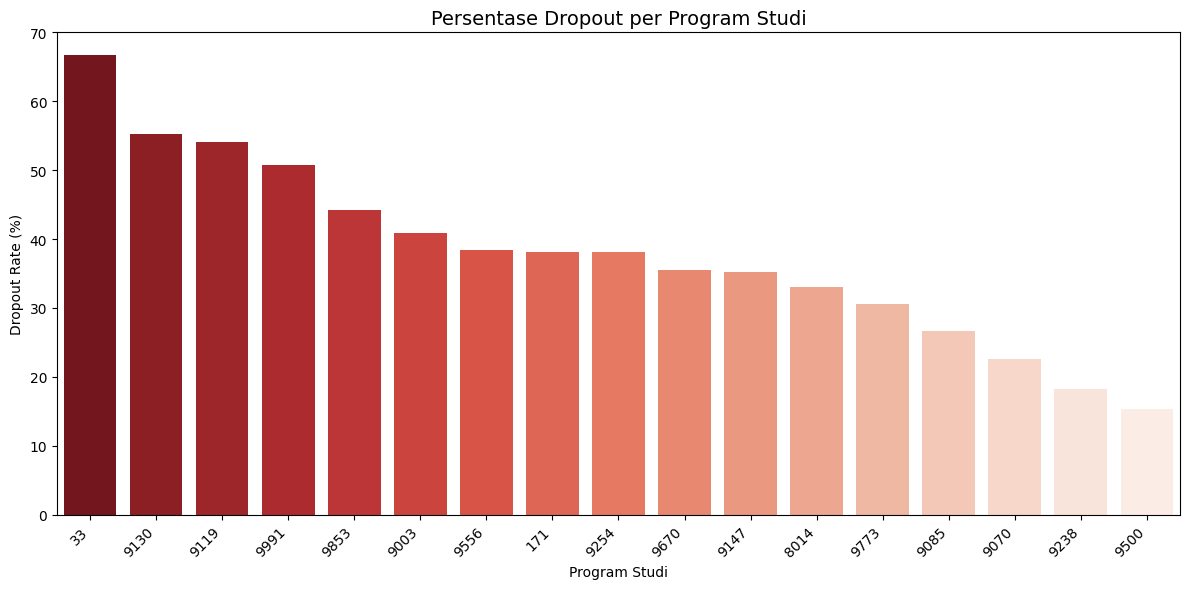

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=course_status[course_status['Status'] == 'Dropout'],
    x='Course',
    y='Percentage',
    order=course_status[course_status['Status'] == 'Dropout']
            .sort_values('Percentage', ascending=False)['Course'],
    palette='Reds_r'
)
plt.xticks(rotation=45, ha='right')
plt.title('Persentase Dropout per Program Studi', fontsize=14)
plt.ylabel('Dropout Rate (%)')
plt.xlabel('Program Studi')
plt.tight_layout()
plt.show()

It can be observed that study program 33 has the highest dropout rate compared to other study programs, which may be an important contributing factor.

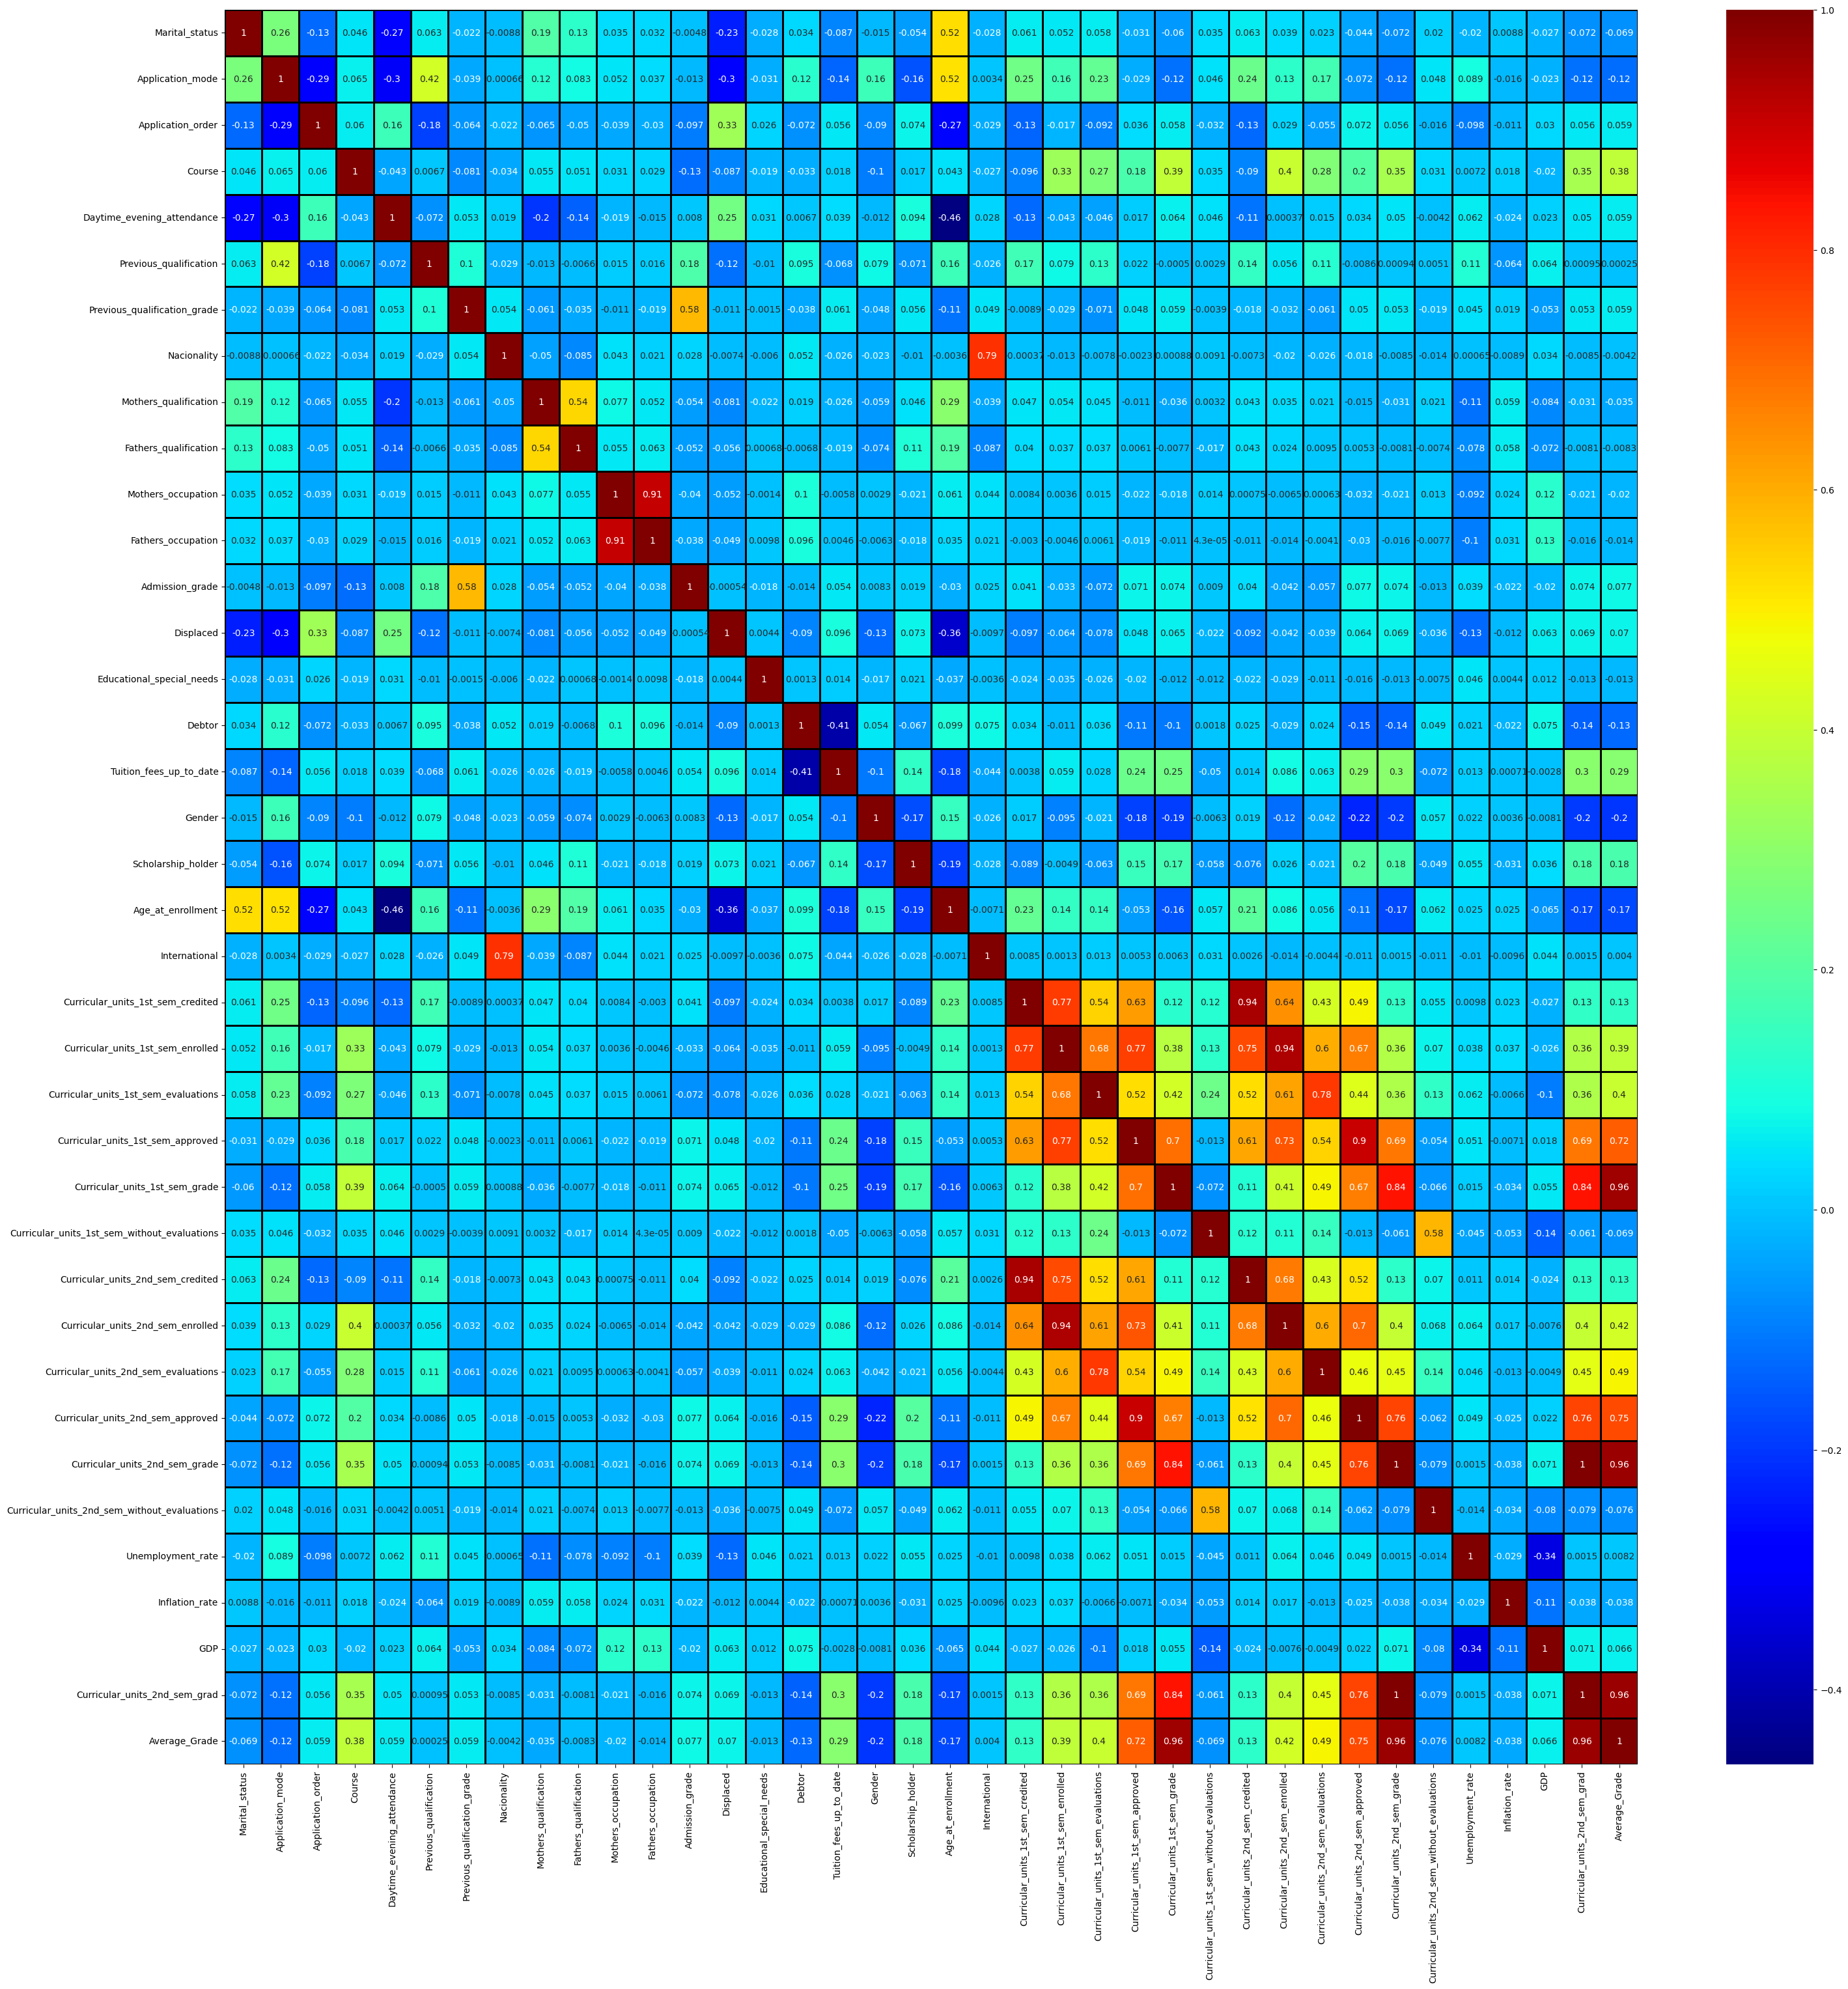

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(edu_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

From the data visualization above, several features show positive and negative correlations with each other, indicating the presence of multicollinearity in the dataset. This issue will be addressed during the feature selection stage using forward selection.

# Modeling

### Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    edu_df,
    test_size=0.10,
    random_state=42,
    stratify=edu_df["Status"]
)

X_train = train_df.drop("Status", axis=1)
y_train = train_df["Status"]

X_test = test_df.drop("Status", axis=1)
y_test = test_df["Status"]

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, MinMaxScaler

In [ ]:
#target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# fitur kategorikal
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

X_train_enc[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test_enc[cat_cols]  = encoder.transform(X_test[cat_cols])

### Feature Importances

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

feature_counts = [8, 10, 12, 15]
results = []

for n in feature_counts:
    rf_fast = RandomForestClassifier(
        n_estimators=20,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )

    sfs = SequentialFeatureSelector(
        rf_fast,
        n_features_to_select=n,
        direction="forward",
        scoring="f1_macro",
        cv=3,
        n_jobs=-1
    )

    sfs.fit(X_train_enc, y_train_enc)
    selected_features = X_train_enc.columns[sfs.get_support()].tolist()

    X_train_sel = X_train_enc[selected_features]
    X_test_sel = X_test_enc[selected_features]

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_sel)
    X_test_scaled = scaler.transform(X_test_sel)

    model = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_scaled, y_train_enc)
    y_pred = model.predict(X_test_scaled)

    f1 = f1_score(y_test_enc, y_pred, average="macro")

    results.append({
        "Fitur": n,
        "F1-Score": round(f1, 4),
        "Features": selected_features
    })

df_comparison = pd.DataFrame(results)
print(df_comparison[["Fitur", "F1-Score"]])

best_idx = df_comparison["F1-Score"].idxmax()
recommended_features = df_comparison.loc[best_idx, "Features"]

print("Selected features:", recommended_features)
print("Jumlah fitur:", len(recommended_features))

   Fitur  F1-Score
0      8    0.6630
1     10    0.6825
2     12    0.6709
3     15    0.6913
Selected features: ['Course', 'Previous_qualification', 'Nacionality', 'Mothers_occupation', 'Tuition_fees_up_to_date', 'Gender', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Unemployment_rate', 'Curricular_units_2nd_sem_grad']
Jumlah fitur: 15


Forward feature selection reduced the feature space from 36 to 12 variables, retaining the most informative academic, demographic, and financial factors relevant to student dropout and graduation.

###Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sel = X_train_enc[recommended_features]
X_test_sel  = X_test_enc[recommended_features]

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled  = scaler.transform(X_test_sel)

### Oversampling

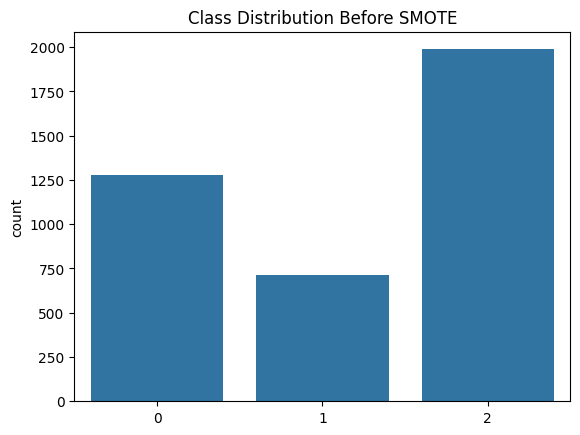

In [ ]:
sns.countplot(x=y_train_enc)
plt.title("Class Distribution Before SMOTE")
plt.show()

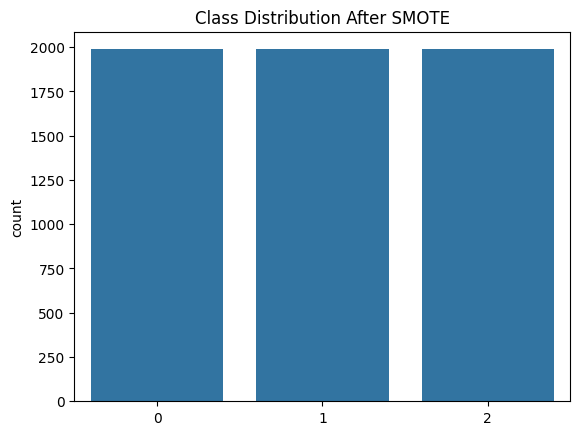

Distribution after SMOTE: Counter({np.int64(0): 1988, np.int64(2): 1988, np.int64(1): 1988})
Training data after SMOTE: (5964, 15)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    X_train_scaled,
    y_train_enc
)

sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE")
plt.show()

print("Distribution after SMOTE:", Counter(y_train_res))
print("Training data after SMOTE:", X_train_res.shape)

Oversampling has been applied, and the training data is now balanced.

The algorithms used in this study are more inclined toward Random Forest, XGBoost, and Gradient Boosting. Therefore, I will experiment with and use three of these algorithms.

##Algorithm

#### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# Baseline model
rf_model = RandomForestClassifier(
    random_state=123,
    n_jobs=-1
)

# Grid parameter
param_grid_fast = {
    'n_estimators': [200, 300],
    'max_depth': [6, 8, None],
    'max_features': ['sqrt'],
    'criterion': ['gini']
}

# GridSearchCV
CV_rdf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_fast,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro',
    verbose=1
)

CV_rdf.fit(X_train_res, y_train_res)

# Best result
print("Best Parameters:", CV_rdf.best_params_)
print("Best F1 Macro Score:", CV_rdf.best_score_)

# Best model
best_rf_model = CV_rdf.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
Best F1 Macro Score: 0.8157102895187918

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       142
           1       0.43      0.40      0.41        80
           2       0.81      0.86      0.83       221

    accuracy                           0.74       443
   macro avg       0.68      0.67      0.68       443
weighted avg       0.74      0.74      0.74       443



In [ ]:
y_pred_rf = best_rf_model.predict(X_test_scaled)

print("Classification Report (Random Forest - Tuned):")
print(classification_report(y_test_enc, y_pred_rf))

Classification Report (Random Forest - Tuned):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       142
           1       0.43      0.40      0.41        80
           2       0.81      0.86      0.83       221

    accuracy                           0.74       443
   macro avg       0.68      0.67      0.68       443
weighted avg       0.74      0.74      0.74       443



#### 2. XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform

# XGBoost model
xgb_model = XGBClassifier(
    random_state=123,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Parameter search
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.05, 0.2),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    random_state=123,
    verbose=1
)

# TRAIN
random_search.fit(X_train_res, y_train_res)

# Best result
print("Best Parameters:", random_search.best_params_)
print("Best F1 Macro Score:", random_search.best_score_)

# Best model
best_xgb_model = random_search.best_estimator_

# TEST
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print("\nClassification Report (XGBoost - Tuned):")
print(classification_report(y_test_enc, y_pred_xgb))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:04:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': np.float64(0.9738738579682363), 'learning_rate': np.float64(0.10356076435807696), 'max_depth': 6, 'n_estimators': 198, 'subsample': np.float64(0.9171873105124426)}
Best F1 Macro Score: 0.7832548774258457

Classification Report (XGBoost - Tuned):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       142
           1       0.51      0.41      0.46        80
           2       0.82      0.89      0.85       221

    accuracy                           0.77       443
   macro avg       0.71      0.69      0.70       443
weighted avg       0.76      0.77      0.76       443



In [ ]:
best_xgb_model = random_search.best_estimator_

# data test prediction (scaled & encoded)
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

print("\nClassification Report (XGBoost - Best Params):")
print(classification_report(y_test_enc, y_pred_xgb))


Classification Report (XGBoost - Best Params):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       142
           1       0.51      0.41      0.46        80
           2       0.82      0.89      0.85       221

    accuracy                           0.77       443
   macro avg       0.71      0.69      0.70       443
weighted avg       0.76      0.77      0.76       443



#### 3. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Gradient Boosting Initiation
gboost_model = GradientBoostingClassifier(random_state=123)

# Grid parameter
param_grid = {
    'n_estimators': [150, 250],
    'learning_rate': [0.05, 0.1],
    'max_features': ['sqrt', None],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
CV_gboost = GridSearchCV(
    estimator=gboost_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro',
    verbose=1
)

# TRAIN → data hasil SMOTE
CV_gboost.fit(X_train_res, y_train_res)

# Best Result
print("Best Parameters:", CV_gboost.best_params_)
print("Best F1 Macro Score:", CV_gboost.best_score_)

# Best Model
best_gboost_model = CV_gboost.best_estimator_

# TEST → real data test (scaled)
y_pred_gboost = best_gboost_model.predict(X_test_scaled)

print("\nClassification Report (Gradient Boosting - Tuned):")
print(classification_report(y_test_enc, y_pred_gboost))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 250, 'subsample': 1.0}
Best F1 Macro Score: 0.7590089243127012

Classification Report (Gradient Boosting - Tuned):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       142
           1       0.46      0.41      0.43        80
           2       0.84      0.89      0.86       221

    accuracy                           0.77       443
   macro avg       0.70      0.69      0.69       443
weighted avg       0.76      0.77      0.76       443



In [ ]:
best_gboost_model = GradientBoostingClassifier(
    learning_rate=0.05,
    max_features='sqrt',
    n_estimators=250,
    subsample=1.0,
    random_state=123
)
best_gboost_model.fit(X_train_res, y_train_res)

y_pred_gb = best_gboost_model.predict(X_test_scaled)

print("\nClassification Report (Gradient Boosting - Tuned):")
print(classification_report(y_test_enc, y_pred_gb))


Classification Report (Gradient Boosting - Tuned):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       142
           1       0.43      0.44      0.43        80
           2       0.84      0.85      0.84       221

    accuracy                           0.75       443
   macro avg       0.69      0.69      0.69       443
weighted avg       0.75      0.75      0.75       443



## Evaluation

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

Graduate (0)       0.82      0.76      0.79       142
 Dropout (1)       0.43      0.40      0.41        80
Enrolled (2)       0.81      0.86      0.83       221

    accuracy                           0.74       443
   macro avg       0.68      0.67      0.68       443
weighted avg       0.74      0.74      0.74       443



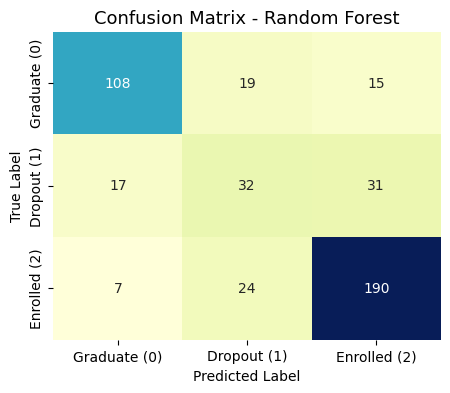

Model: XGBoost

Classification Report:
              precision    recall  f1-score   support

Graduate (0)       0.80      0.78      0.79       142
 Dropout (1)       0.51      0.41      0.46        80
Enrolled (2)       0.82      0.89      0.85       221

    accuracy                           0.77       443
   macro avg       0.71      0.69      0.70       443
weighted avg       0.76      0.77      0.76       443



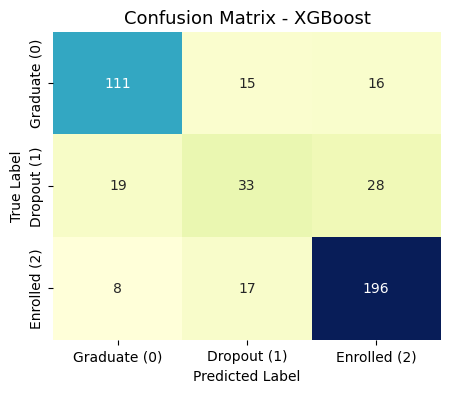

Model: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

Graduate (0)       0.80      0.77      0.79       142
 Dropout (1)       0.43      0.44      0.43        80
Enrolled (2)       0.84      0.85      0.84       221

    accuracy                           0.75       443
   macro avg       0.69      0.69      0.69       443
weighted avg       0.75      0.75      0.75       443



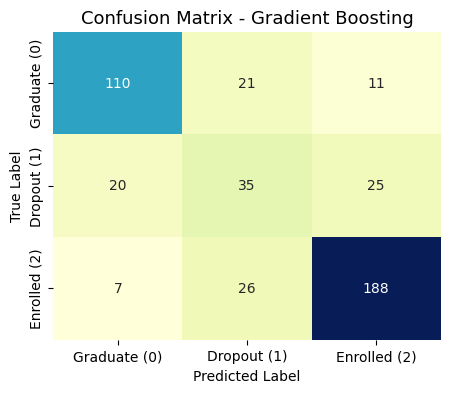

In [ ]:
from sklearn.metrics import confusion_matrix
def evaluating(model_name, y_true, y_pred, labels=None, label_names=None):
    print(f"Model: {model_name}")

    # Default labels
    if labels is None:
        labels = sorted(list(set(y_true)))
    if label_names is None:
        label_names = [str(l) for l in labels]

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=label_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=13)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return cm_df

labels = [0, 1, 2]
label_names = ['Graduate (0)', 'Dropout (1)', 'Enrolled (2)']

cm_rf  = evaluating("Random Forest", y_test_enc, y_pred_rf, labels, label_names)
cm_xgb = evaluating("XGBoost", y_test_enc, y_pred_xgb, labels, label_names)
cm_gb  = evaluating("Gradient Boosting", y_test_enc, y_pred_gb, labels, label_names)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
classes = ['Graduate', 'Dropout', 'Enrolled']

# Gradient Boosting
f1_gb = f1_score(y_test_enc, y_pred_gb, average=None)
f1_gb_avg = f1_score(y_test_enc, y_pred_gb, average='macro')
acc_gb = accuracy_score(y_test_enc, y_pred_gb)

# XGBoost
f1_xgb = f1_score(y_test_enc, y_pred_xgb, average=None)
f1_xgb_avg = f1_score(y_test_enc, y_pred_xgb, average='macro')
acc_xgb = accuracy_score(y_test_enc, y_pred_xgb)

# Random Forest
f1_rf = f1_score(y_test_enc, y_pred_rf, average=None)
f1_rf_avg = f1_score(y_test_enc, y_pred_rf, average='macro')
acc_rf = accuracy_score(y_test_enc, y_pred_rf)

In [ ]:
performance_table = pd.DataFrame({
    'Class': classes + ['Average F1', 'Accuracy'],
    'Gradient Boosting': list(f1_gb) + [f1_gb_avg, acc_gb],
    'XGBoost': list(f1_xgb) + [f1_xgb_avg, acc_xgb],
    'Random Forest': list(f1_rf) + [f1_rf_avg, acc_rf]
})

print(performance_table)


        Class  Gradient Boosting   XGBoost  Random Forest
0    Graduate           0.788530  0.792857       0.788321
1     Dropout           0.432099  0.455172       0.412903
2    Enrolled           0.844944  0.850325       0.831510
3  Average F1           0.688524  0.699452       0.677578
4    Accuracy           0.751693  0.767494       0.744921


Based on the evaluation results, XGBoost can be considered the best overall model because:

- It achieves the highest accuracy (≈ 76.7%) among all evaluated models.

- It records the highest average (macro) F1-score (≈ 0.70), indicating the most balanced performance across all three classes.

- It demonstrates superior performance on the minority class (Dropout) compared to both Gradient Boosting and Random Forest, while maintaining strong predictive performance on the Graduate and Enrolled classes.

Although Gradient Boosting and Random Forest show competitive and relatively stable results, their macro F1-scores and accuracy are consistently lower than those of XGBoost. Therefore, XGBoost provides the most reliable and balanced classification performance for this dataset.

In [ ]:
import joblib

joblib.dump(best_xgb_model, "xgb_model.pkl")

joblib.dump(scaler, "scaler.pkl")

joblib.dump(recommended_features, "features.pkl")

['features.pkl']

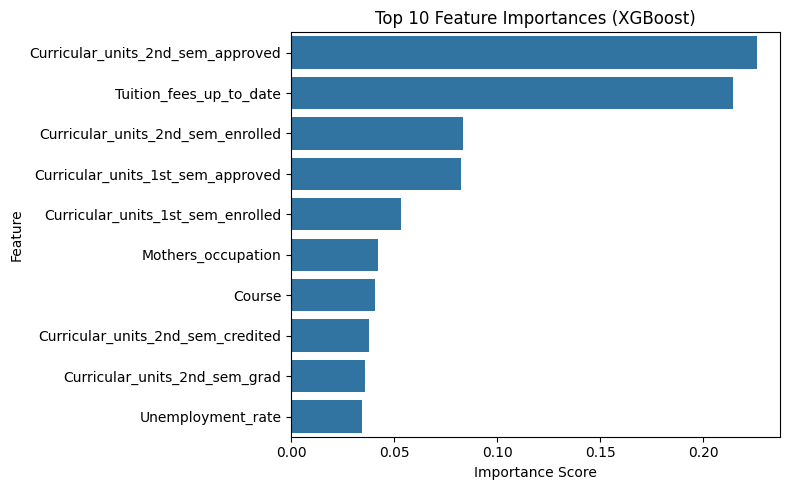

,Feature,Importance
12,Curricular_units_2nd_sem_approved,0.225934
4,Tuition_fees_up_to_date,0.214296
11,Curricular_units_2nd_sem_enrolled,0.083407
9,Curricular_units_1st_sem_approved,0.082661
8,Curricular_units_1st_sem_enrolled,0.053515
3,Mothers_occupation,0.042138
0,Course,0.040602
10,Curricular_units_2nd_sem_credited,0.037779
14,Curricular_units_2nd_sem_grad,0.035684
13,Unemployment_rate,0.034481


In [ ]:
def plot_feature_importances(feature_importances, feature_names, top_n=15):
    features = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=features,
        x='Importance',
        y='Feature'
    )
    plt.title(f'Top {top_n} Feature Importances (XGBoost)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return features


# feature importance XGBoost
plot_feature_importances(
    best_xgb_model.feature_importances_,
    recommended_features,
    top_n=10
)